

# **Scaling, Re-sizing, Interpolations and Cropping**

**In this lesson we'll learn:**
1. How to re-size and scale images
2. Image Pyramids
3. Cropping

### **Re-sizing**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Resizing.png)

Re-sizing is a simple function that we execute using the cv2.resize function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- if dsize is None the output image is calculated as a function of scaling using x & y scale 

#### **List of Interpolation Methods:**
- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fastest
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best

In [21]:
import numpy
import matplotlib.pyplot as plt
import cv2

def imshow(image, title='', size=10):
    w, h= image.shape[:2]
    aspect_ratio= w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    

### **Types of re-scaling Methods in OpenCV**

- **INTER_NEAREST** – a nearest-neighbor interpolation
- **INTER_LINEAR** – a bilinear interpolation (used by default)
- **INTER_AREA** – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to theINTER_NEAREST method.
- **INTER_CUBIC** – a bicubic interpolation over 4×4 pixel neighborhood
- **INTER_LANCZOS4** – a Lanczos interpolation over 8×8 pixel neighborhood



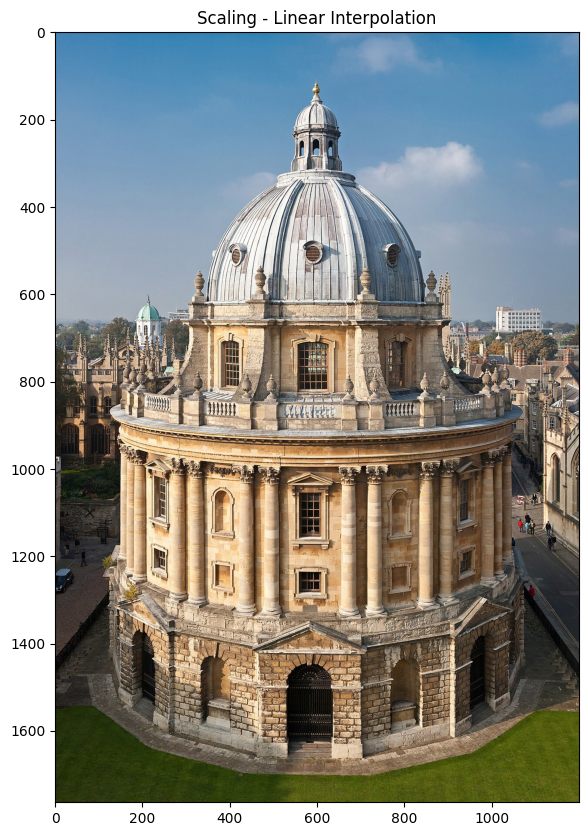

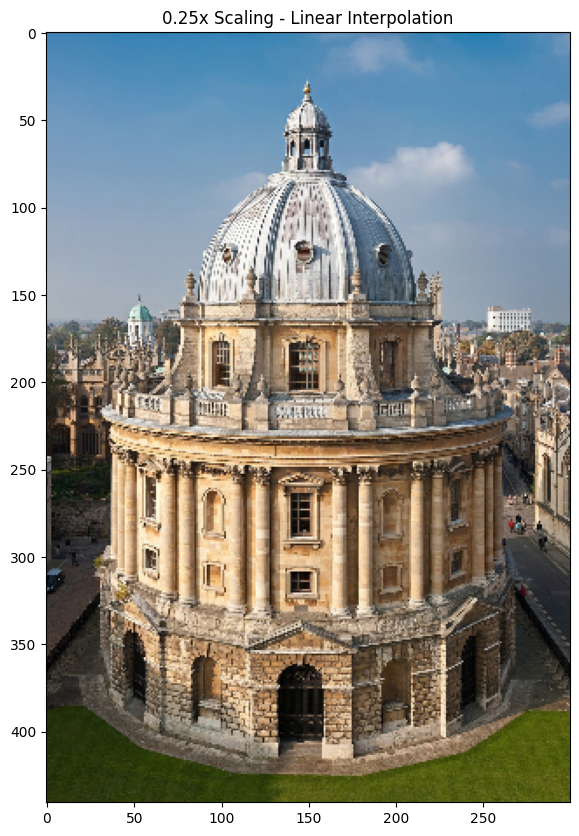

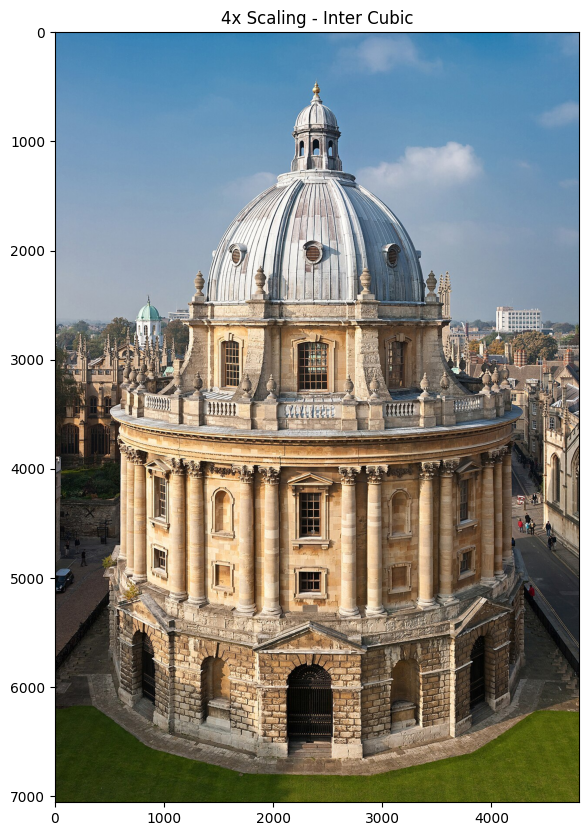

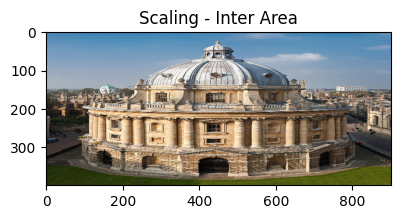

In [27]:
image= cv2.imread("images/oxford_library.jpg")
imshow(image, 'Scaling - Linear Interpolation')

# If no interpolation is specified cv.INTER_LINEAR is used as default
# Let's make our image 3/4 of it's original size
image_scaled= cv2.resize(image, None, fx=0.25, fy=0.25)
imshow(image_scaled, '0.25x Scaling - Linear Interpolation')

# Let's multiply the size of our image
image_scaled= cv2.resize(image, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
imshow(image_scaled, '4x Scaling - Inter Cubic')

# Let's multiply the size of our image using inter_nearest interpolation
image_scaled= cv2.resize(image, None, fx=4, fy=4, interpolation= cv2.INTER_NEAREST)
imshow(image_scaled, '4x Scaling - Inter Nearest')

# Let's skew the re-sizing by setting exact dimensions
image_scaled= cv2.resize(image, (900,400), cv2.INTER_AREA)
imshow(image_scaled, 'Scaling - Inter Area')

## **Image Pyramids**

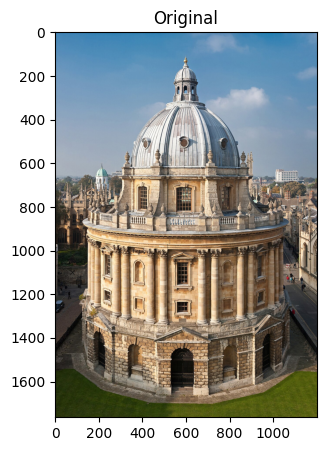

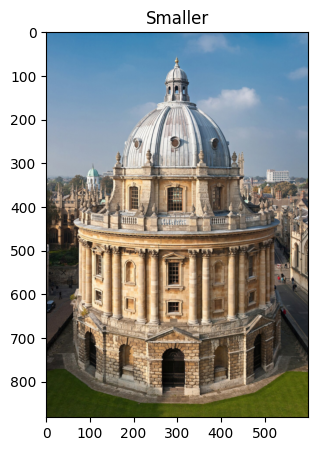

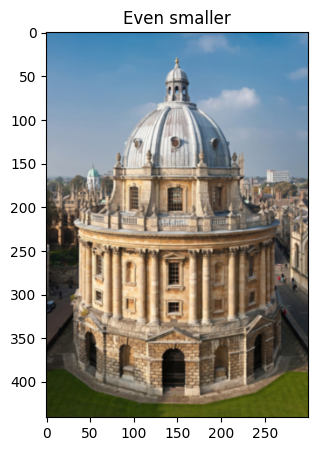

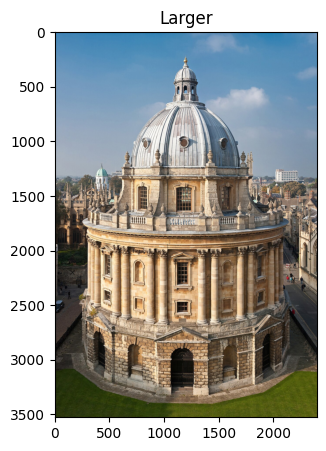

In [33]:
image= cv2.imread('images/oxford_library.jpg')

smaller= cv2.pyrDown(image)
smaller2= cv2.pyrDown(smaller)
imshow(image, 'Original', 5)
imshow(smaller, 'Smaller', 5)
imshow(smaller2, 'Even smaller', 5)

larger= cv2.pyrUp(image)
imshow(larger, 'Larger', 5)

## **Cropping**

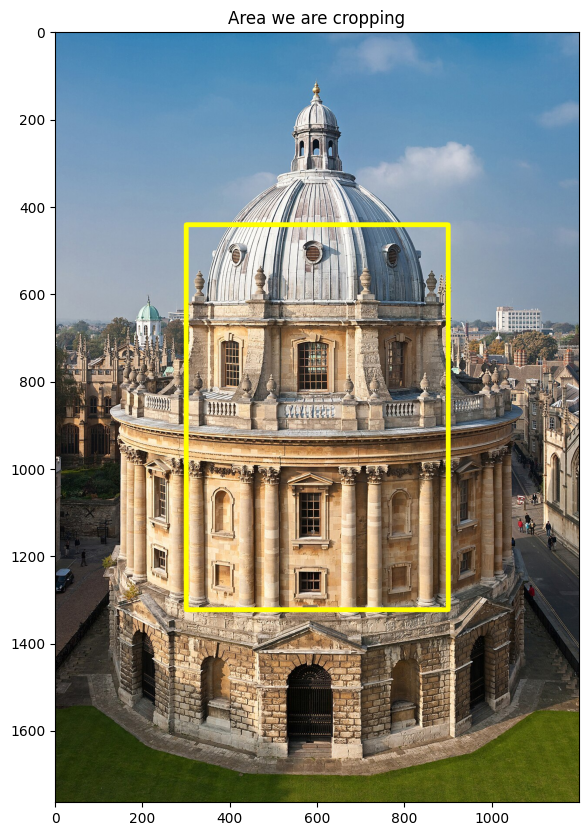

In [48]:
image = cv2.imread('images/oxford_library.jpg')

# Get our image dimensions
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
# using 0.25 to get the x,y position that is 1/4 down from the top left (0,0)
start_row, start_col= int(height*0.25), int(width*0.25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col= int(height*0.75), int(width*0.75)

# Simply use indexing to crop out the rectangle we desire
cropped= image[start_row:end_row, start_col:end_col]

imshow(image, 'Original image')

# The cv2.rectangle function draws a rectangle over our image (in-place operation)
copy= image.copy()
cv2.rectangle(copy, (start_col, start_row), (end_col,end_row), (0,255,255), 10)

imshow(copy, 'Area we are cropping')
imshow(cropped, 'Cropped image')

In [39]:
height*0.25, height/4

(441.0, 441.0)

In [40]:
image.shape

(1764, 1200, 3)